In [1]:
from datetime import datetime
import os
os.chdir('..')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import datajoint as dj
from pipeline import (reference, subject, acquisition, stimulation, analysis,
                      intracellular, extracellular, behavior, utilities)

Connecting root@127.0.0.1:3306


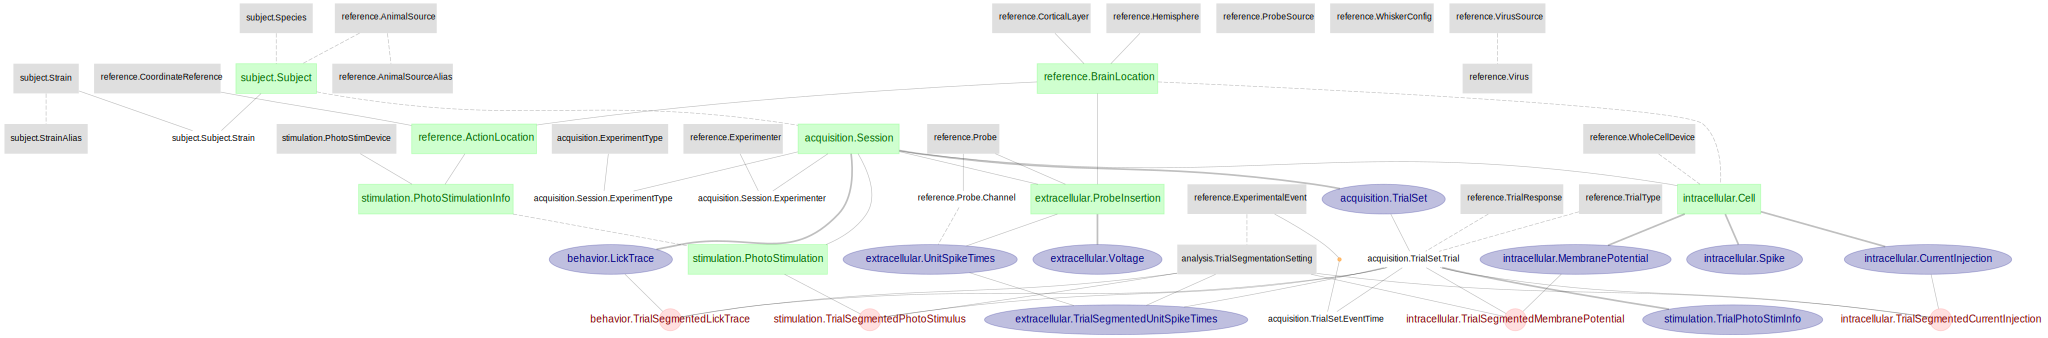

In [2]:
all_erd = (dj.ERD(reference) + dj.ERD(subject)
           + dj.ERD(acquisition) + dj.ERD(analysis)
           + dj.ERD(stimulation) + dj.ERD(behavior)
           + dj.ERD(extracellular) + dj.ERD(intracellular))
dj.ERD(all_erd)

## Reproduce Figure 3a - whole-cell

In [3]:
seg_param_key = (analysis.TrialSegmentationSetting & {'event': 'delay_start', 'pre_stim_duration': 2, 'post_stim_duration': 3}).fetch1()

In [4]:
contra_trials = {'trial_type': 'lick right', 'trial_response': 'correct'}
ipsi_trials = {'trial_type': 'lick left', 'trial_response': 'correct'}

In [54]:
cell_ids = [96, 120, 149]

In [55]:
cells = {f'cell_{c}': {'w_current_injection': ((intracellular.Cell & {'cell_id': f'cell_{c}'}) 
                                                  & (acquisition.Session.ExperimentType & {'experiment_type': 'EPSP'})).fetch('KEY'),
                         'wo_current_injection': ((intracellular.Cell & {'cell_id': f'cell_{c}'})
                                                 & (acquisition.Session.ExperimentType & {'experiment_type': 'regular'})).fetch('KEY')} 
           for c in cell_ids}

In [56]:
for k, v in cells.items():
    cell_mps[k]['type'] = (acquisition.Session.ExperimentType & v['w_current_injection']).fetch('experiment_type')

In [ ]:
def query_segmented_intracellular(cell_key, trial_key, seg_param_key):
    data_keys = (intracellular.TrialSegmentedMembranePotential & cell_key & seg_param_key &
                 (acquisition.TrialSet.Trial & trial_key))
    return [{**dict(zip(['segmented_mp', 'segmented_mp_wo_spike'],
                        (analysis.TrialSegmentedIntracellular.MembranePotential & k).fetch1(
                            'segmented_mp', 'segmented_mp_wo_spike'))),
             **dict(zip(*(acquisition.TrialSet.RealignedEventTime & k).fetch(
                 'realigned_trial_event', 'realigned_event_time')))}
            for k in data_keys]

In [53]:
cell_mps = {cell: {'w_current_injection': {'contra': (intracellular.TrialSegmentedMembranePotential 
                                                      & c_val['w_current_injection'] & seg_param_key & contra_trials),
                                           'ipsi': {}},
                   'wo_current_injection': {'contra': {},
                                           'ipsi': {}}
                  } for cell, c_val in cells.items}

{'cell_96': {'wo_current_injection': [OrderedDict([('session_id',
                 '1e6585e7e5bf45f79610f63d1c119a35'),
                ('cell_id', 'cell_96')])],
  'w_current_injection': [OrderedDict([('session_id',
                 '5ddd032961614b96898d275590f5efea'),
                ('cell_id', 'cell_96')])],
  'type': array(['Auditory task', 'EPSP', 'intracellular'], dtype=object)},
 'cell_120': {'wo_current_injection': [OrderedDict([('session_id',
                 '51fc12513e8e4bf6839b146032ab289e'),
                ('cell_id', 'cell_120')])],
  'w_current_injection': [OrderedDict([('session_id',
                 '8476012ca7d841699703cd7b6d0ce832'),
                ('cell_id', 'cell_120')])],
  'type': array(['Auditory task', 'EPSP', 'intracellular'], dtype=object)},
 'cell_149': {'wo_current_injection': [OrderedDict([('session_id',
                 'ec419933030b49f4aaac6f3aaa27bbb1'),
                ('cell_id', 'cell_149')])],
  'w_current_injection': [OrderedDict([('session_id'